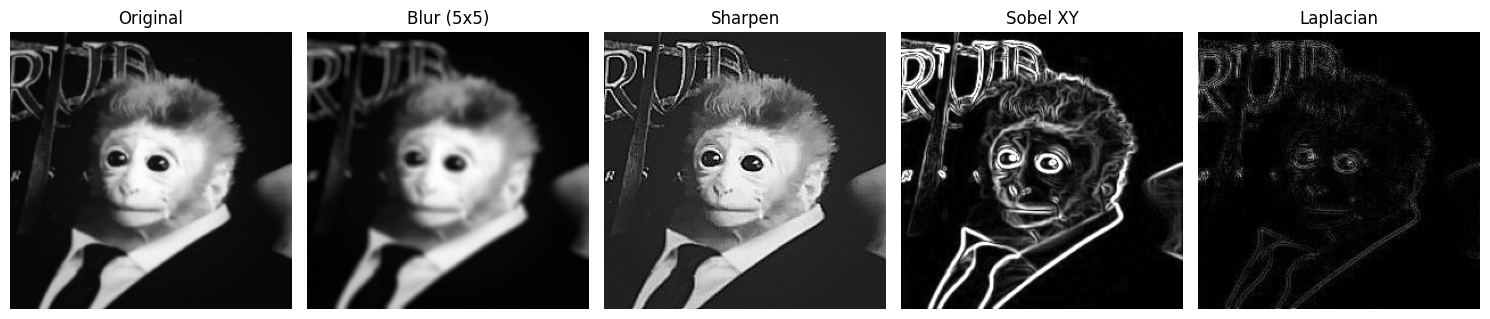

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
def cargar_imagen(ruta):
    imagen = cv2.imread(ruta)
    if imagen is None:
        raise FileNotFoundError("No se pudo cargar la imagen.")
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    return imagen, gris

# Aplicar distintos filtros y detecciones
def aplicar_filtros(gris):
    resultados = {}
    resultados['Original'] = gris
    resultados['Blur (5x5)'] = cv2.blur(gris, (5, 5))

    # Filtro de agudizado clásico
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    resultados['Sharpen'] = cv2.filter2D(gris, -1, sharpen_kernel)

    # Sobel en X y Y
    sobel_x = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
    resultados['Sobel XY'] = np.uint8(np.clip(sobel_mag, 0, 255))

    # Laplaciano
    laplacian = cv2.Laplacian(gris, cv2.CV_64F)
    resultados['Laplacian'] = np.uint8(np.absolute(laplacian))

    return resultados

# Mostrar imágenes en una sola figura
def mostrar_resultados(resultados):
    n = len(resultados)
    plt.figure(figsize=(15, 4))
    for i, (titulo, imagen) in enumerate(resultados.items()):
        plt.subplot(1, n, i + 1)
        cmap = 'gray' if len(imagen.shape) == 2 else None
        plt.imshow(imagen, cmap=cmap)
        plt.title(titulo)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Procesamiento en tiempo real con webcam 
def procesar_webcam():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("No se pudo acceder a la cámara.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.blur(gris, (5, 5))

        cv2.imshow("Original", frame)
        cv2.imshow("Blur", blur)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Interfaz con sliders para experimentar con kernel size
def sliders_dinamicos(imagen_gris):
    def actualizar(val):
        k = cv2.getTrackbarPos("Kernel", "Slider")
        k = max(1, k | 1)  # Asegura que sea impar
        blur = cv2.GaussianBlur(imagen_gris, (k, k), 0)
        cv2.imshow("Blur", blur)

    cv2.namedWindow("Slider")
    cv2.resizeWindow("Slider", 400, 50)
    cv2.createTrackbar("Kernel", "Slider", 3, 50, actualizar)
    actualizar(3)

    while True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

ruta_img = '../datos/miquito.jpg'

imagen_color, imagen_gris = cargar_imagen(ruta_img)
resultados = aplicar_filtros(imagen_gris)
mostrar_resultados(resultados)

#procesar_webcam()
#sliders_dinamicos(imagen_gris)
